In [ ]:
# Imports
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Data Exploration
# Convert the dataset into a DataFrame
iris_df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
iris_df['target'] = iris.target

print(iris_df.head())

# Check for missing values
print(iris_df.isnull().sum())

# Check the distribution of target classes
print(iris_df['target'].value_counts())

# Separate features and target variable
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the shape of X_scaled and y_encoded
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_encoded:", y_encoded.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
target
0    50
1    50
2    50
Name: count, dtype: int64
Shape of X_scaled: (150, 4)
Shape of y_encoded: (150,)


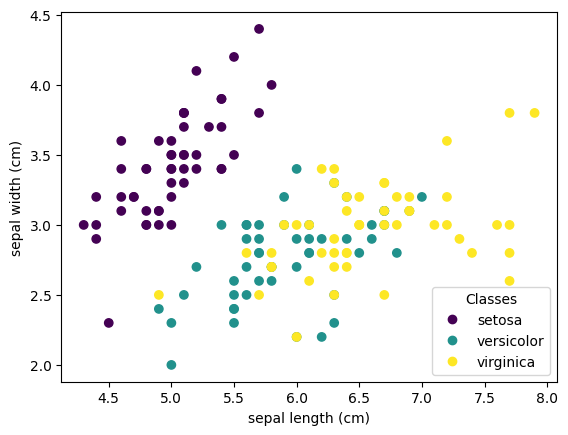

In [ ]:
# Scatter Plot of Iris Dataset
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Experiment with different SVM kernels and parameters
kernels = ['poly', 'rbf', 'sigmoid']
Cs = [0.1, 1]
gammas = ['scale', 'auto']

In [ ]:
# Define a function to train and evaluate the SVM model
def train_evaluate_svm(kernel='poly', C=1.0, gamma='scale'):
    # Initialize the SVM classifier
    svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma)

    # Train the SVM classifier
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [ ]:
accuracies = np.zeros((len(kernels), len(Cs), len(gammas)))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(Cs):
        for k, gamma in enumerate(gammas):
            accuracy = train_evaluate_svm(kernel, C, gamma)
            accuracies[i, j, k] = accuracy

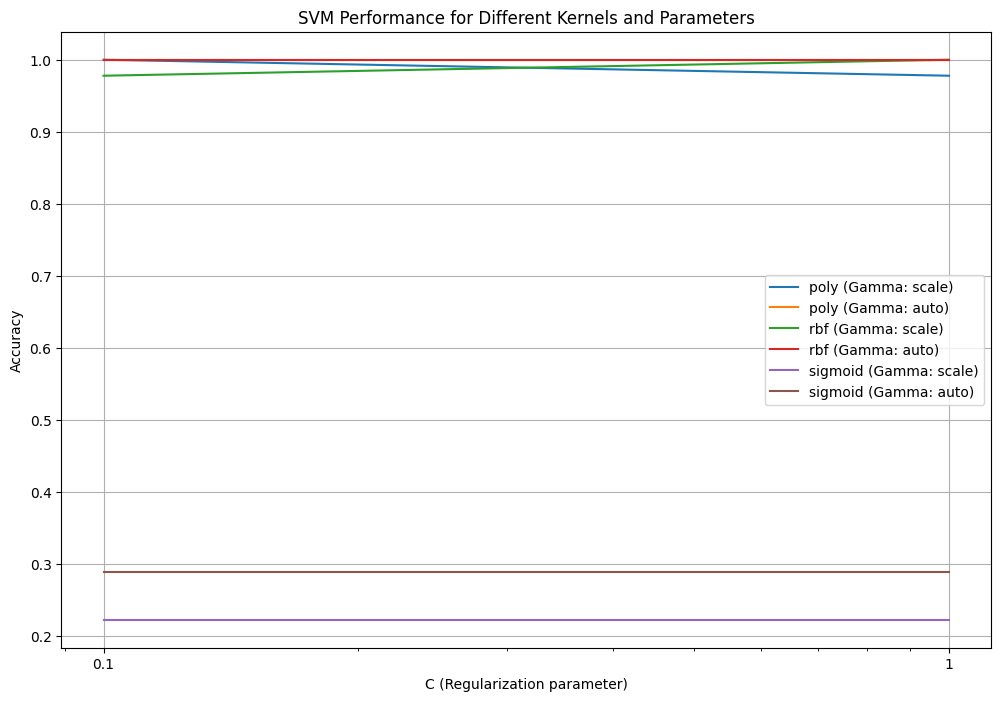

In [ ]:
# Plot the graph
plt.figure(figsize=(12, 8))

for i, kernel in enumerate(kernels):
    plt.plot(Cs, accuracies[i,:,0], label=f'{kernel} (Gamma: scale)')
    plt.plot(Cs, accuracies[i,:,1], label=f'{kernel} (Gamma: auto)')

plt.title('SVM Performance for Different Kernels and Parameters')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xticks(Cs, Cs)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# K Fold Cross Validation Implementation (Number of Folds (K) = 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Function to validate the results of SVM and return mean accuracy
def cross_validate_svm(kernel='poly', C=1.0, gamma='scale'):
    svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma)
    scores = cross_val_score(svm_classifier, X, y, cv=kf)
    return np.mean(scores)

In [ ]:
mean_scores = np.zeros((len(kernels), len(Cs), len(gammas)))

for i, kernel in enumerate(kernels):
    for j, C in enumerate(Cs):
        for k, gamma in enumerate(gammas):
            mean_score = cross_validate_svm(kernel, C, gamma)
            mean_scores[i, j, k] = mean_score

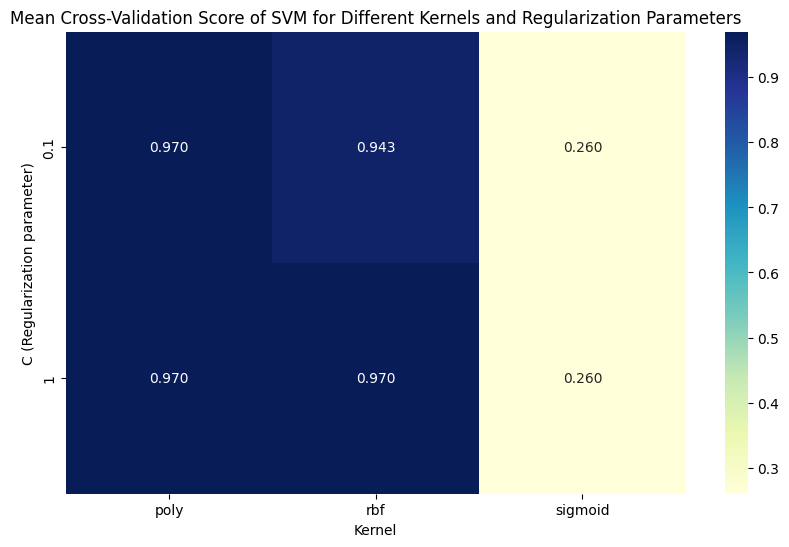

In [ ]:
# Plot the heatmap of mean scores
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores.mean(axis=2).T, annot=True, fmt=".3f", xticklabels=kernels, yticklabels=Cs, cmap="YlGnBu")
plt.title('Mean Cross-Validation Score of SVM for Different Kernels and Regularization Parameters')
plt.xlabel('Kernel')
plt.ylabel('C (Regularization parameter)')
plt.show()

In [ ]:
# Report Generation
# Function to train and evaluate the SVM model and return classification report
def train_evaluate_svm_report(kernel='poly', C=1.0, gamma='scale'):
    svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    return classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)

In [ ]:
# Classification reports
classification_reports = {}

# Experiment with different SVM kernels and parameters
for kernel in kernels:
    for C in Cs:
        for gamma in gammas:
            key = f'{kernel}_{C}_{gamma}'
            classification_reports[key] = train_evaluate_svm_report(kernel, C, gamma)

# Extract evaluation metrics for each configuration
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}

for key, report in classification_reports.items():
    accuracies[key] = report['accuracy']
    precisions[key] = report['macro avg']['precision']
    recalls[key] = report['macro avg']['recall']
    f1_scores[key] = report['macro avg']['f1-score']

# Print evaluation metrics
print("Evaluation Metrics:")
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("SVM Configuration", "Accuracy", "Precision", "Recall", "F1-Score"))
for key in classification_reports:
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(key, accuracies[key], precisions[key], recalls[key], f1_scores[key]))

Evaluation Metrics:
SVM Configuration    Accuracy   Precision  Recall     F1-Score  
poly_0.1_scale       1.0000     1.0000     1.0000     1.0000    
poly_0.1_auto        1.0000     1.0000     1.0000     1.0000    
poly_1_scale         0.9778     0.9762     0.9744     0.9743    
poly_1_auto          1.0000     1.0000     1.0000     1.0000    
rbf_0.1_scale        0.9778     0.9762     0.9744     0.9743    
rbf_0.1_auto         1.0000     1.0000     1.0000     1.0000    
rbf_1_scale          1.0000     1.0000     1.0000     1.0000    
rbf_1_auto           1.0000     1.0000     1.0000     1.0000    
sigmoid_0.1_scale    0.2222     0.1449     0.2564     0.1852    
sigmoid_0.1_auto     0.2889     0.0963     0.3333     0.1494    
sigmoid_1_scale      0.2222     0.1449     0.2564     0.1852    
sigmoid_1_auto       0.2889     0.0963     0.3333     0.1494    


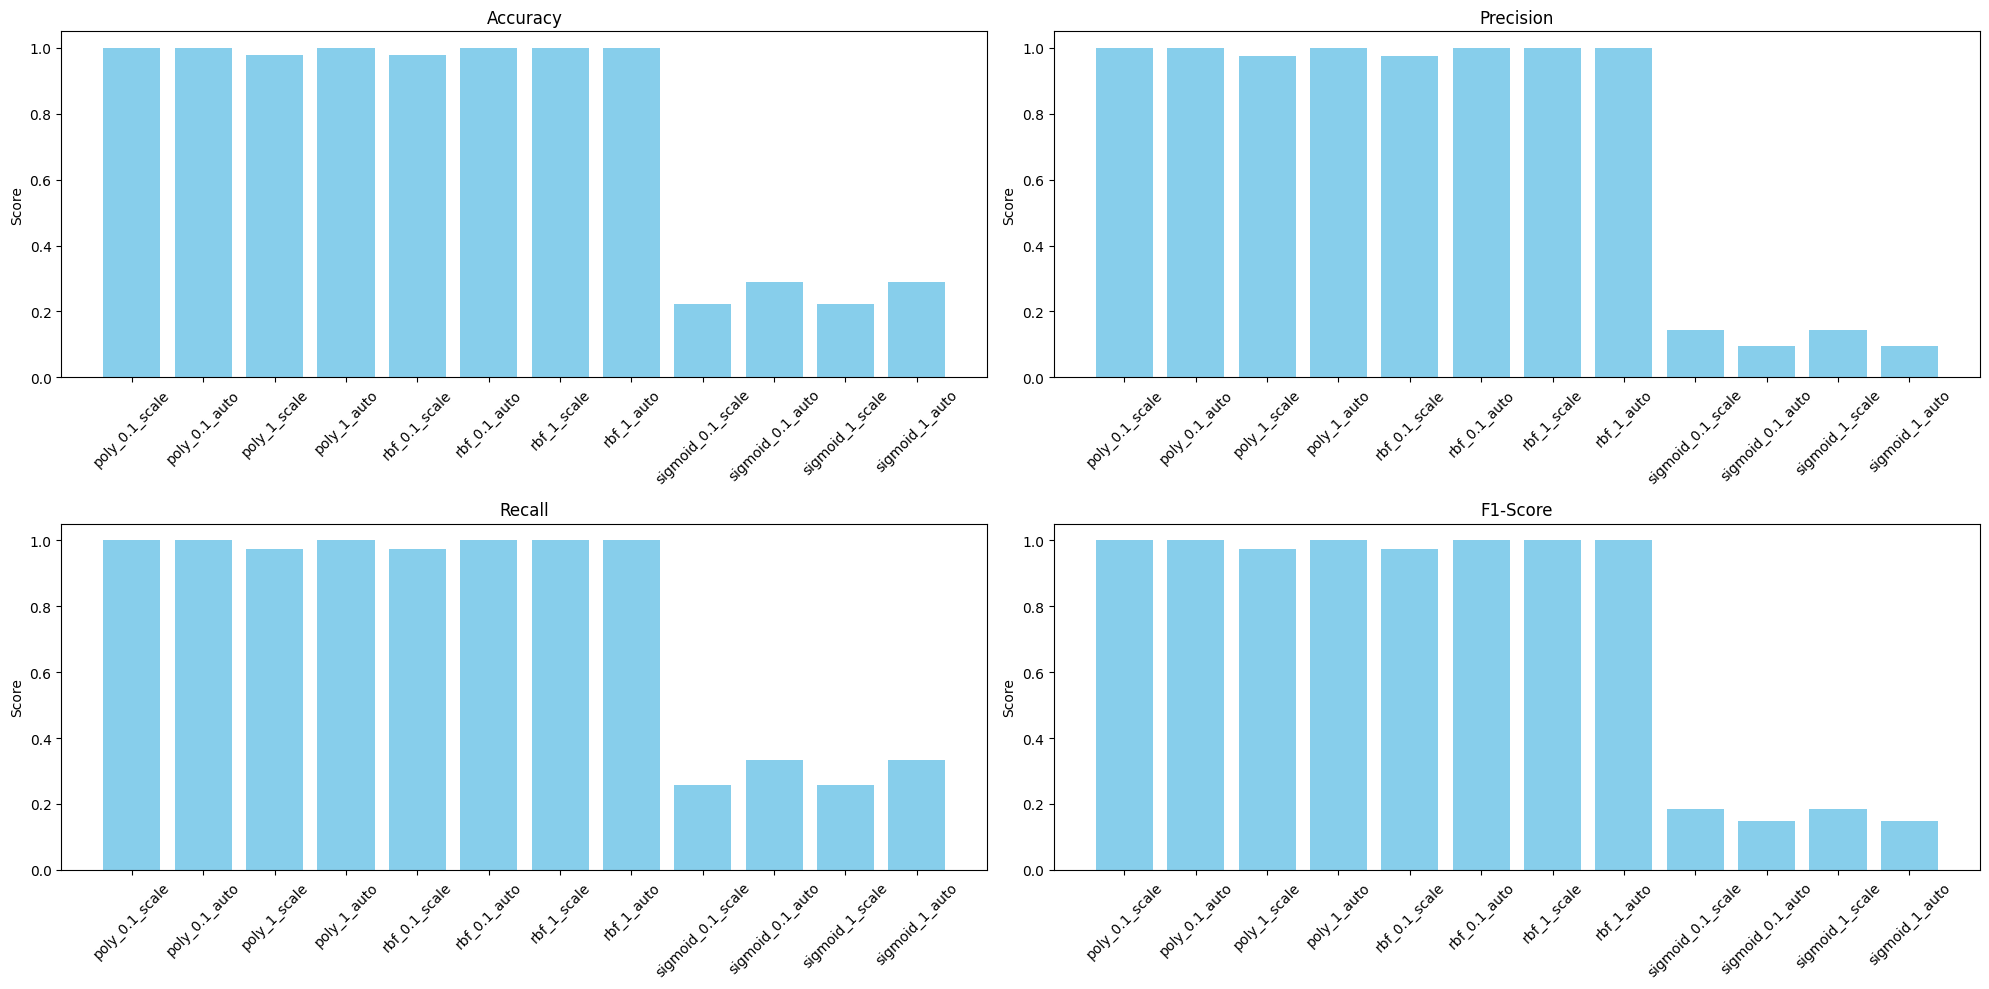

In [ ]:
# Plot a graph
# Extract evaluation metrics for each configuration
evaluation_metrics = {
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

# Plot bar graphs for each evaluation metric
plt.figure(figsize=(20, 10))
for i, (metric_name, metric_values) in enumerate(evaluation_metrics.items()):
    plt.subplot(2, 2, i+1)
    plt.bar(range(len(metric_values)), list(metric_values.values()), align='center', color='skyblue')
    plt.xticks(range(len(metric_values)), list(metric_values.keys()), rotation=45)
    plt.title(metric_name)
    plt.ylabel('Score')

plt.tight_layout()
plt.show()